<a href="https://colab.research.google.com/github/AmauDev/dnn_linear_reg_energy/blob/main/linear_reg_dnn_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#!pip install datadotworld
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [46]:
url = 'https://download.data.world/s/lngaoenkucn36daivae5toxtuayjnl'
s = requests.get(url).content
dataset = pd.read_csv(io.StringIO(s.decode('utf-8')))
df = dataset.copy()

In [47]:
df = df.dropna()
#df = pd.get_dummies(df, prefix='', prefix_sep='')

In [95]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

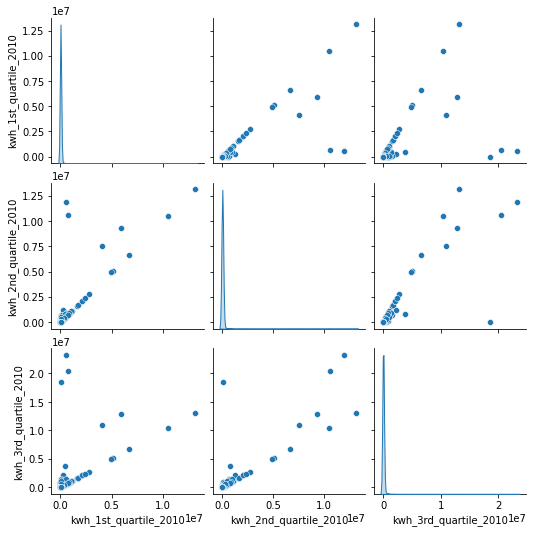

In [49]:
sns.pairplot(train_df[['kwh_1st_quartile_2010', 'kwh_2nd_quartile_2010', 'kwh_3rd_quartile_2010']], diag_kind='kde')

In [51]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
kwh_1st_quartile_2010,4000.0,33338.042125,343204.400494,107.0,4832.75,6692.5,10118.750,13123858.0
kwh_2nd_quartile_2010,4000.0,46194.715125,452611.968222,126.0,7427.75,9591.0,13972.625,13123858.0
kwh_3rd_quartile_2010,4000.0,66471.261500,712523.495845,126.0,10055.75,12944.0,18711.750,23287256.0


In [97]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('kwh_3rd_quartile_2010')
test_labels = test_features.pop('kwh_3rd_quartile_2010')

In [52]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [98]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 40000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

def build_and_compile_model(norm):
  model = keras.Sequential([
                          norm,
                          layers.Dense(64, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(1)
  ])

  model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001))

  return model

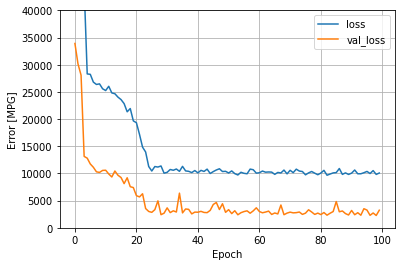

In [99]:
dnn_model = build_and_compile_model(normalizer)

history = dnn_model.fit(
    train_features,train_labels,
    validation_split=0.05,
    verbose=0,
    epochs=100
)

plot_loss(history)

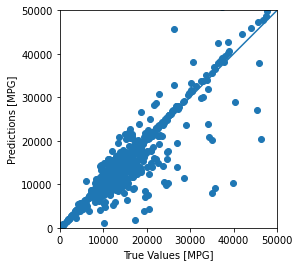

In [101]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

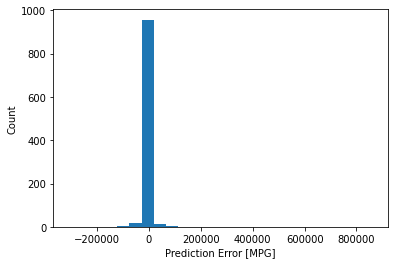

In [106]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [107]:
dnn_model.save('dnn_model_energy')

INFO:tensorflow:Assets written to: dnn_model_energy/assets
